<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up-Environment" data-toc-modified-id="Set-Up-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up Environment</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Train-Test-split" data-toc-modified-id="Train-Test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train Test split</a></span></li><li><span><a href="#Dummify-dataset" data-toc-modified-id="Dummify-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dummify dataset</a></span></li><li><span><a href="#Scale-the-values" data-toc-modified-id="Scale-the-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scale the values</a></span></li><li><span><a href="#Model-evaluation-metric:-Precision-score" data-toc-modified-id="Model-evaluation-metric:-Precision-score-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model evaluation metric: Precision score</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Gradient Boosting</a></span></li><li><span><a href="#GNB" data-toc-modified-id="GNB-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>GNB</a></span></li></ul></li><li><span><a href="#Comparison-of-Precision-Score" data-toc-modified-id="Comparison-of-Precision-Score-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparison of Precision Score</a></span></li><li><span><a href="#ROC-AUC-Curve" data-toc-modified-id="ROC-AUC-Curve-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ROC AUC Curve</a></span></li></ul></div>

## Set Up Environment

In [1]:
import sys
sys.path.insert(0,'..')
import preprocessing_module as pm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style = "whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings(action="ignore")

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
# from collections import Counter
from sklearn.utils.class_weight import compute_sample_weight

## Load Data

In [3]:
accepted = pd.read_csv('../data/accepted_2007_to_2018Q4.csv')
accepted_clean = pm.datacleaning(accepted)

In [4]:
y = accepted_clean.loan_status
X = accepted_clean.drop('loan_status',1)

In [5]:
print(X.shape)
X.head()

(482335, 32)


,open_acc,total_acc,inq_last_6mths,collections_12_mths_ex_med,tot_coll_amt,revol_bal,pub_rec,pub_rec_bankruptcies,acc_now_delinq,all_util,revol_util,delinq_2yrs,initial_list_status,tot_cur_bal,avg_cur_bal,int_rate,dti,home_ownership,annual_inc,purpose,emp_length,term,addr_state,installment,mort_acc,application_type,verification_status,fico_range_low,fico_range_high,loan_amnt,grade,length_cr_line
421101,7.0,30.0,0.0,0.0,0.0,141.0,0.0,0.0,0.0,1.0,0.5,0.0,w,150592.0,25099.0,7.34,0.58,RENT,52000.0,major_purchase,9 years,36 months,WA,93.10,4.0,Individual,Source Verified,760.0,764.0,3000.0,A,20.0
421113,14.0,24.0,0.0,0.0,0.0,11449.0,1.0,1.0,0.0,47.0,33.9,0.0,w,28880.0,2222.0,11.98,14.18,OWN,55000.0,other,10+ years,36 months,GA,166.03,0.0,Individual,Not Verified,675.0,679.0,5000.0,B,17.0
421120,13.0,29.0,0.0,0.0,0.0,5004.0,0.0,0.0,0.0,90.0,36.0,0.0,w,131726.0,10977.0,11.98,20.25,MORTGAGE,40000.0,home_improvement,< 1 year,36 months,TX,232.44,0.0,Individual,Verified,695.0,699.0,7000.0,B,11.0
421135,11.0,26.0,1.0,0.0,0.0,29222.0,0.0,0.0,0.0,69.0,53.2,0.0,w,157566.0,14324.0,21.85,27.58,OWN,57000.0,debt_consolidation,10+ years,36 months,FL,1143.39,2.0,Individual,Verified,680.0,684.0,30000.0,D,18.0
421137,15.0,27.0,0.0,0.0,0.0,14591.0,0.0,0.0,0.0,34.0,34.2,1.0,w,128270.0,8551.0,20.39,15.76,OWN,85000.0,home_improvement,10+ years,60 months,NY,560.94,3.0,Individual,Source Verified,665.0,669.0,21000.0,D,10.0


## Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify = y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

## Dummify dataset

In [7]:
X_train_dum, X_test_dum = pm.Dummify(X_train, X_test)

## Scale the values

In [8]:
scaler = MinMaxScaler()
X_train_stan = pd.DataFrame(scaler.fit_transform(X_train_dum), columns=X_train_dum.columns)
X_test_stan = pd.DataFrame(scaler.transform(X_test_dum), columns=X_train_dum.columns)

## Model evaluation metric: Precision score


In [9]:
def eval_model(model, best_model, X_train, X_test, y_train, y_test):
    print(model,'score')
    print('-'*30)
    print('Train: Precision score:', round(precision_score(y_train, best_model.predict(X_train)),5))
    print('Test: Precision score:', round(precision_score(y_test, best_model.predict(X_test)),5))
    print(' ')
    print("Train Test Confusion Matrix")
    print('-'*30)
    print('Train Set')
    print(confusion_matrix(y_train, best_model.predict(X_train)))
    print('Test Set')
    print(confusion_matrix(y_test, best_model.predict(X_test)))

In [39]:
X_test_dum.shape

(144701, 105)

## Modeling

### Logistic Regression

In [10]:
# logistic = LogisticRegression(random_state = 0, solver="liblinear", penalty = 'l1', class_weight = 'balanced')

In [11]:
# param_grid = {'C': np.logspace(-2,1,50)}
# logisticcv = RandomizedSearchCV(logistic, 
#                              param_grid, 
#                              scoring = 'precision', 
#                              cv = 3, 
#                              verbose = 1, 
#                              n_jobs = 5)
# para_search = logisticcv.fit(X_train_stan, y_train)
# best_logistic = para_search.best_estimator_
# print('Best estimator:', best_logistic)

In [12]:
best_logistic = joblib.load('best_logistic.pkl')

In [53]:
best_logistic.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.7906043210907697, class_weight='balanced', penalty='l1',
                   random_state=0, solver='liblinear')>

In [13]:
eval_model('Logistic Regression', best_logistic, X_train_stan, X_test_stan, y_train, y_test)

Logistic Regression score
------------------------------
Train: Precision score: 0.87771
Test: Precision score: 0.87639
 
Train Test Confusion Matrix
------------------------------
Train Set
[[ 50322  23255]
 [ 97157 166900]]
Test Set
[[21429 10104]
 [41529 71639]]


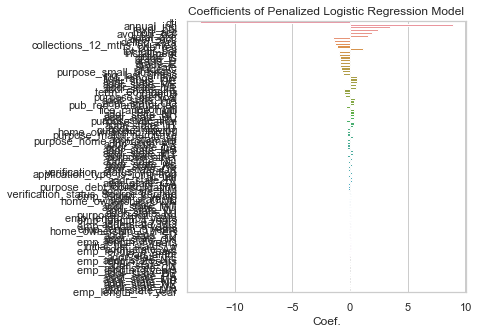

In [14]:
logistic_coef = pd.DataFrame(best_logistic.coef_.T, index = X_train_stan.columns).rename(columns = {0:"Coef."})
logistic_coef = logistic_coef.reindex(logistic_coef["Coef."].abs().sort_values(ascending = False).index)
logistic_coef = logistic_coef.reset_index()
plt.figure(figsize = (5,5))
sns.barplot(data = logistic_coef[logistic_coef['Coef.'] != 0], x = 'Coef.', y = 'index');
plt.title('Coefficients of Penalized Logistic Regression Model');
plt.ylabel('');

### Random Forest

In [15]:
# randomForest = RandomForestClassifier(random_state = 0, 
#                                       max_features = 'auto', 
#                                       max_depth = 3, 
#                                       class_weight = 'balanced_subsample')
# grid_para_forest = {'n_estimators': range(480,600,10),
#                     'min_samples_split': range(5,14),
#                     'min_samples_leaf' : range(2,9)}

In [16]:
# grid_search_forest = RandomizedSearchCV(randomForest,
#                                         grid_para_forest,
#                                         cv=3, 
#                                         n_jobs = 5, 
#                                         verbose = 1,
#                                         scoring = 'precision')
# # Fit Random Forest 
# para_search = grid_search_forest.fit(X_train_dum, y_train)

# # Save the best estimator
# best_rf = para_search.best_estimator_
# print('Best parameters:', para_search.best_params_)

In [17]:
best_rf = joblib.load('best_rf.pkl')

In [56]:
best_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       min_samples_leaf=8, min_samples_split=5,
                       n_estimators=570, random_state=0)>

In [18]:
eval_model('Random Forest', best_rf, X_train_dum, X_test_dum, y_train, y_test)

Random Forest score
------------------------------
Train: Precision score: 0.87302
Test: Precision score: 0.87283
 
Train Test Confusion Matrix
------------------------------
Train Set
[[ 50126  23451]
 [102825 161232]]
Test Set
[[21465 10068]
 [44064 69104]]


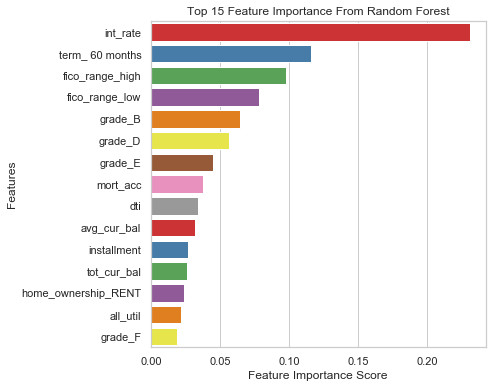

In [19]:
sorted_importance = sorted(zip(X_train_dum.columns, best_rf.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (6,6))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df.head(15), x = 'importance_score', y= 'feature_name', orient = 'h', palette = 'Set1');
plt.title('Top 15 Feature Importance From Random Forest');
plt.xlabel('Feature Importance Score');
plt.ylabel('Features');

### Gradient Boosting

In [20]:
# taking account the imbalance of the dataset and apply weights
sample_weight = compute_sample_weight(class_weight = 'balanced', y = y_train)

In [21]:
# gb = GradientBoostingClassifier(random_state = 0, max_features = 'auto', max_depth = 2)
# grid_para_gb = {'n_estimators': range(250,350,10),
#                 'learning_rate': np.logspace(-3,0,50),
#                     'min_samples_split': range(11,25),
#                     'min_samples_leaf' : range(11,25)}

In [22]:
# grid_search_gb = RandomizedSearchCV(gb, 
#                                     grid_para_gb, 
#                                     cv= 3, 
#                                     n_jobs = 5, 
#                                     verbose = 1,
#                                     scoring = 'precision')
# para_search = grid_search_gb.fit(X_train_dum, y_train, sample_weight = sample_weight)
# best_gb = para_search.best_estimator_
# print('Best parameters:', para_search.best_params_)

In [23]:
best_gb = joblib.load('best_gb.pkl')

In [57]:
best_gb.get_params

<bound method BaseEstimator.get_params of GradientBoostingClassifier(learning_rate=0.28117686979742307, max_depth=2,
                           max_features='auto', min_samples_leaf=22,
                           min_samples_split=19, n_estimators=330,
                           random_state=0)>

In [24]:
eval_model('Gradient Boosting', best_gb, X_train_dum, X_test_dum, y_train, y_test)

Gradient Boosting score
------------------------------
Train: Precision score: 0.8836
Test: Precision score: 0.88102
 
Train Test Confusion Matrix
------------------------------
Train Set
[[ 51335  22242]
 [ 95212 168845]]
Test Set
[[21771  9762]
 [40886 72282]]


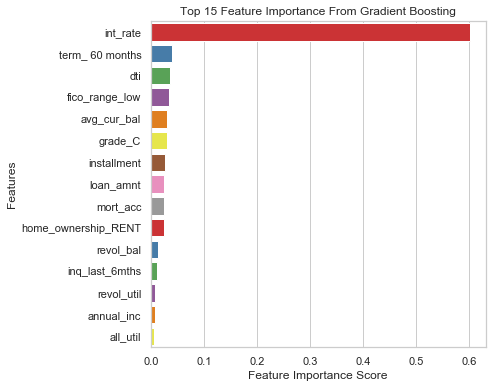

In [25]:
sorted_importance = sorted(zip(X_train_dum.columns, best_gb.feature_importances_), key=lambda t:t[1], reverse=True)
a, b = zip(*sorted_importance)
plt.figure(figsize = (6,6))
df = pd.DataFrame({'feature_name':a, 'importance_score':b})
sns.barplot(data = df.head(15), x = 'importance_score', y= 'feature_name', orient = 'h', palette = 'Set1');
plt.title('Top 15 Feature Importance From Gradient Boosting');
plt.xlabel('Feature Importance Score');
plt.ylabel('Features');

### GNB

In [26]:
# gnb = GaussianNB()
# grid_para_gnb = {'var_smoothing': np.logspace(2,5,20)}

In [27]:
# grid_search_gnb = GridSearchCV(gnb,
#                                grid_para_gnb,
#                                cv= 3, 
#                                n_jobs = 5, 
#                                verbose = 1,
#                                scoring = 'precision')
# para_search = grid_search_gnb.fit(X_train_stan, y_train, sample_weight = sample_weight)
# best_gnb = para_search.best_estimator_
# print('Best parameters:', para_search.best_params_)

In [28]:
best_gnb = joblib.load('best_gnb.pkl')

In [58]:
best_gnb.get_params

<bound method BaseEstimator.get_params of GaussianNB(var_smoothing=23357.21469090121)>

In [29]:
eval_model('GNB', best_gnb, X_train_dum, X_test_dum, y_train, y_test)

GNB score
------------------------------
Train: Precision score: 0.81316
Test: Precision score: 0.81304
 
Train Test Confusion Matrix
------------------------------
Train Set
[[ 31511  42066]
 [ 80981 183076]]
Test Set
[[13486 18047]
 [34686 78482]]


## Comparison of Precision Score

In [30]:
precision_scores = pd.DataFrame([[precision_score(y_train, best_gnb.predict(X_train_dum)),
                              precision_score(y_test, best_gnb.predict(X_test_dum))],
                              [precision_score(y_train, best_rf.predict(X_train_dum)), 
                               precision_score(y_test, best_rf.predict(X_test_dum))],
                              [precision_score(y_train, best_logistic.predict(X_train_stan)),
                              precision_score(y_test, best_logistic.predict(X_test_stan))],
                              [precision_score(y_train, best_gb.predict(X_train_dum)),
                               precision_score(y_test, best_gb.predict(X_test_dum))]],
                            index = ['Naive Bayes','Random Forest','L1 Logistic Reg.',
                                     'Gradient Boosting'],
                            columns = ['Train','Test'])

In [31]:
precision_scores = pd.DataFrame(precision_scores.unstack()).reset_index()
precision_scores.columns = ['tt','model','score']

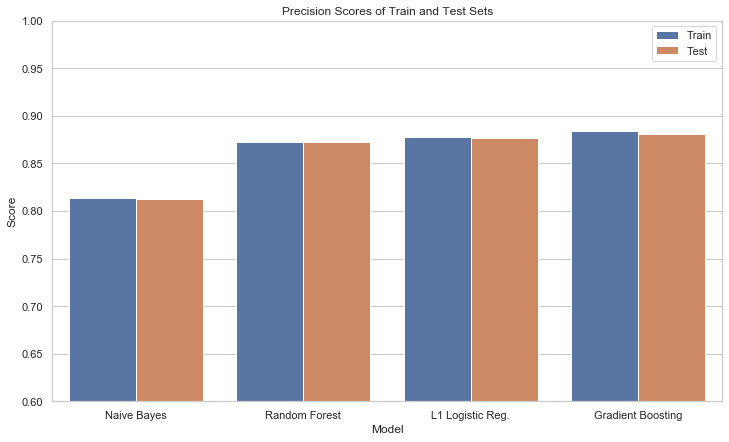

In [32]:
plt.figure(figsize = (12,7))
sns.barplot(data = precision_scores, x = 'model', y = 'score', hue = 'tt');
plt.title('Precision Scores of Train and Test Sets');
plt.xlabel('Model');
plt.ylabel('Score');
plt.ylim(0.6,1.0);
plt.legend().set_title("")
# plt.legend(handles=handles, ncol = 3).set_title("")

## ROC AUC Curve

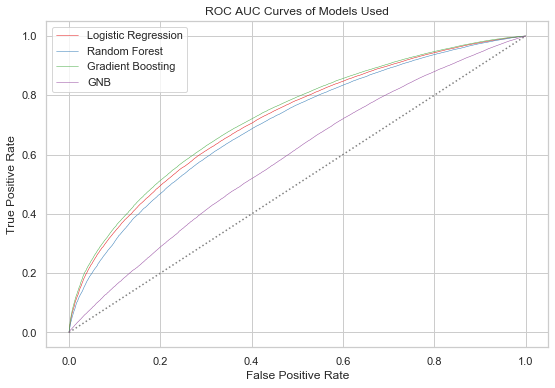

In [55]:
sns.set_palette('Set1')
random_probs = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, best_logistic.predict_proba(X_test_stan)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test_dum)[:,1])
gb_fpr, gb_tpr, _ = roc_curve(y_test, best_gb.predict_proba(X_test_dum)[:,1])
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, best_gnb.predict_proba(X_test_dum)[:,1])


# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle = ':', color = 'gray');
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Regression', linewidth = 0.5);
plt.plot(rf_fpr, rf_tpr, label='Random Forest', linewidth = 0.5);
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting', linewidth = 0.5);
plt.plot(gnb_fpr, gnb_tpr, label='GNB', linewidth = 0.5);

plt.legend();
plt.title('ROC AUC Curves of Models Used')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

In [33]:
print('ROC AUC Scores')
print('-'*30)
print('Logistic Reg.:', roc_auc_score(y_test, best_logistic.predict_proba(X_test_stan)[:,1]))
print('Random Forest:', roc_auc_score(y_test, best_rf.predict_proba(X_test_dum)[:,1]))
print('Gradient Boosting:', roc_auc_score(y_test, best_gb.predict_proba(X_test_dum)[:,1]))
print('GNB:', roc_auc_score(y_test, best_gnb.predict_proba(X_test_dum)[:,1]))

ROC AUC Scores
------------------------------
Logistic Reg.: 0.7166911495446622
Random Forest: 0.7004279184086685
Gradient Boosting: 0.7267266778105828
GNB: 0.5857705227146546


In [34]:
roc_auc = pd.DataFrame(
   [['GNB',roc_auc_score(y_test, best_gnb.predict_proba(X_test_dum)[:,1])],
    ['RF', roc_auc_score(y_test, best_rf.predict_proba(X_test_dum)[:,1])],
    ['LR (L1)', roc_auc_score(y_test, best_logistic.predict_proba(X_test_stan)[:,1])],
    ['GB',roc_auc_score(y_test, best_gb.predict_proba(X_test_dum)[:,1])]],
    columns = ['Model','ROC_AUC_Score'])

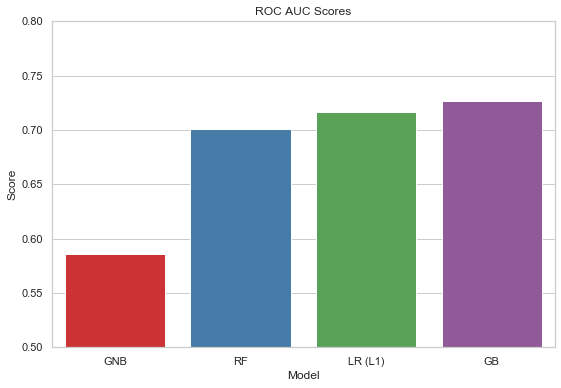

In [37]:
sns.barplot(data = roc_auc, x = 'Model', y = 'ROC_AUC_Score');
plt.title('ROC AUC Scores');
plt.xlabel('Model');
plt.ylabel('Score');
plt.ylim(0.5,0.8);